# Level 4
## a) Recreate the section on regularization by VanderPlas and prepare a short presentation.
## b) Recreate the bike example from VanderPlas.

In [17]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_35132\2066640392.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [18]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [19]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_35132\217070952.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0, inplace=True)


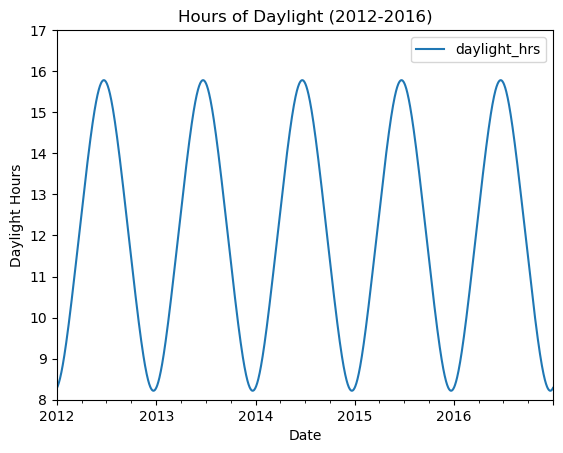

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a date range for the years 2012 to 2016
date_range = pd.date_range('2012-01-01', '2016-12-31', freq='D')

# Create a DataFrame with the date range as the index
daily = pd.DataFrame(index=date_range)

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    # Compute the hours of daylight for the given date
    days = (date - pd.Timestamp(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

# Compute daylight hours for the specified date range
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

# Plot the data
daily[['daylight_hrs']].plot(title="Hours of Daylight (2012-2016)")
plt.ylim(8, 17)
plt.ylabel("Daylight Hours")
plt.xlabel("Date")
plt.show()


In [22]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [23]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [24]:
daily.head()

,daylight_hrs,PRCP,Temp (C),dry day,annual
2012-01-01,8.290187,0.000000,4.80,1,0.000000
2012-01-02,8.304641,0.001693,4.40,0,0.002740
2012-01-03,8.320386,0.000118,4.90,0,0.005479
2012-01-04,8.337411,0.003150,4.80,0,0.008219
2012-01-05,8.355700,0.000197,4.25,0,0.010959


In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar

# Read data
# Parse the date format explicitly based on your data
counts = pd.read_csv('FremontBridge.csv', index_col='Date')

# Convert the index to datetime, matching the format in your file
counts.index = pd.to_datetime(counts.index, format='%m/%d/%Y %I:%M:%S %p')
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

# Resample traffic data to daily totals
daily = counts.resample('D').sum()
daily['Total'] = daily.sum(axis=1)

# Add day-of-week columns
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

# Add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012-01-01', '2016-12-31')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

# Add daylight hours
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    days = (date - pd.Timestamp(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))

# Process weather data
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

# Merge weather data into daily
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

# Add annual column
daily['annual'] = (daily.index - daily.index[0]).days / 365.

# Display the first few rows
print(daily.head())



            Fremont Bridge Sidewalks, south of N 34th St  \
Date                                                       
2012-10-02                                        1938.0   
2012-10-03                                        3521.0   
2012-10-04                                        3475.0   
2012-10-05                                        3148.0   
2012-10-06                                        2006.0   

            Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk  \
Date                                                                             
2012-10-02                                             1165.0                    
2012-10-03                                             1761.0                    
2012-10-04                                             1767.0                    
2012-10-05                                             1590.0                    
2012-10-06                                              926.0                    

    

C:\Users\felip\AppData\Local\Temp\ipykernel_35132\1008542512.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0, inplace=True)


In [31]:
from sklearn.linear_model import LinearRegression

# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

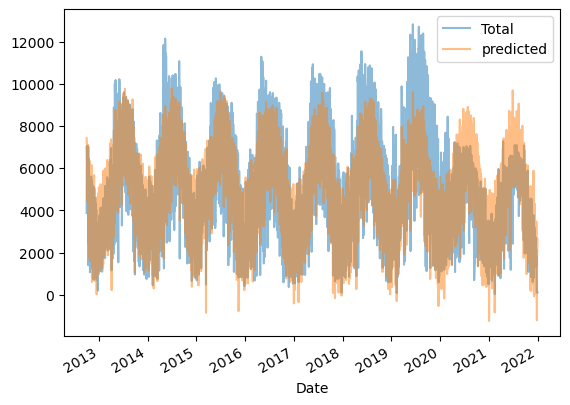

In [32]:
daily[['Total', 'predicted']].plot(alpha=0.5);
plt.show()

In [33]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon               -875.800495
Tue               -525.307464
Wed               -536.201806
Thu               -793.133651
Fri              -1355.308670
Sat              -3566.259619
Sun              -3771.201645
holiday          -2265.709085
daylight_hrs       185.972368
PRCP           -350513.458176
dry day            997.830795
Temp (C)           852.299190
annual             -86.359293
dtype: float64

In [34]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [35]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                effect    error
Mon             -876.0    156.0
Tue             -525.0    158.0
Wed             -536.0    162.0
Thu             -793.0    159.0
Fri            -1355.0    153.0
Sat            -3566.0    154.0
Sun            -3771.0    153.0
holiday        -2266.0    259.0
daylight_hrs     186.0     16.0
PRCP         -350513.0  23796.0
dry day          998.0     62.0
Temp (C)         852.0     40.0
annual           -86.0      9.0
